# Exploring miRge3.0 features for miRNA vs other RNA

In [126]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [78]:
dfs = []

with open('feature_files.txt', 'r') as file_list:
    for filename in file_list.readlines():
        filename = re.sub('\n', '', filename)
        df = pd.read_csv(filename)
        rna_type = re.search('[^.]*$', re.sub('_dataset_15_refined_features.csv', '', filename)).group(0)
        df['rna_type'] = rna_type
        dfs.append(df)

In [81]:
feature_df = pd.concat(dfs)

In [94]:
feature_df[feature_df['rna_type'] != 'other'].groupby('rna_type').count().iloc[:, 0]

rna_type
lncRNA     1794
miRNA      2220
miscRNA      42
rRNA         31
snoRNA      531
Name: realMicRNA, dtype: int64

In [92]:
feature_df[feature_df['rna_type'] != 'other'].to_csv('feature_df_no_other.tsv', sep='\t', index=None)

In [77]:
re.search('[^.]*$', re.sub('_dataset_15_refined_features.csv', '', filename)).group(0)

'snoRNA'

In [95]:
df = feature_df[feature_df['rna_type'] != 'other']

In [175]:
def keep_col(col_name):
    if 'real' in col_name or 'head' in col_name or 'tail' in col_name:
        return False
    else:
        return True
    
cols_for_plotting = [col for col in df.columns if keep_col(col)]

In [176]:
cols_for_plotting

['clusterName',
 'seqCount',
 'readCountSum',
 'exactMatchRatio',
 'armType',
 'distanceToloop',
 'percentage_PairedInMiRNA',
 'hairpin_count',
 'binding_count',
 'interiorLoopCount',
 'apicalLoop_size',
 'stem_length',
 'mFE',
 'count_bindings_in_miRNA',
 'UGU_UGUG_motif',
 'pair_state',
 'rna_type']

In [211]:
subtypes = [subtype for subtype in df.groupby('rna_type').count().index.tolist() if 'miRNA' != subtype]

In [212]:
subtypes

['lncRNA', 'miscRNA', 'rRNA', 'snoRNA']

In [208]:
letters = ['a', 'b', 'c']
for letter, i in enumerate(letters):
    print(letter, i)

0 a
1 b
2 c


In [251]:
def compare_features(df, feature, title=None, rna_subtypes=None, merge=False):
    if title is None:
        title = feature
    miRNA = df[df['rna_type'] == 'miRNA']
    if rna_subtypes is None:
        plt.rcParams['font.size'] = 20
        non_miRNA = df[df['rna_type'] != 'miRNA']
        fig, axs = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
        axs[0].hist(miRNA[feature], density=True, bins='auto');
        axs[0].set_title('miRNA')
        axs[0].text(.05, .8, 'N = {length} \nmean = {mean}'.format(length = len(miRNA), mean = round(miRNA[feature].mean(), 1)), transform=axs[0].transAxes)
        axs[1].hist(non_miRNA[feature], density=True, bins='auto');
        axs[1].text(.05, .8, 'N = {length} \nmean = {mean}'.format(length = len(non_miRNA), mean = round(non_miRNA[feature].mean(), 1)), transform=axs[1].transAxes)
        axs[1].set_title('non_miRNA')
        axs[1].set_xlabel('value')
        axs[0].set_xlabel('value')
        axs[0].set_ylabel('density')
        fig.suptitle(title)
        plt.savefig('feature_plots/miRNA_vs_non/' + feature + '.png')
        plt.close(fig)
    else:
        plt.rcParams['font.size'] = 30
        fig, axs = plt.subplots(2, 3, sharey=True, sharex=True, figsize=(30, 20))
        fig.fontsize=30
        axs[0, 0].hist(miRNA[feature], density=True, bins='auto');
        axs[0, 0].set_title('miRNA')
        axs[0, 0].text(.05, .8, 'N = {length} \nmean = {mean}'.format(length = len(miRNA), mean = round(miRNA[feature].mean(), 1)), transform=axs[0, 0].transAxes)
        axs[0, 0].xaxis.set_tick_params(which='both', labelbottom=True)
        for i, ax in enumerate(fig.axes[1:-1]):
            subtype_RNA = df[df['rna_type'] == subtypes[i-1]]
            ax.hist(subtype_RNA[feature], density=True, bins='auto');
            ax.text(.05, .8, 'N = {length} \nmean = {mean}'.format(length = len(subtype_RNA), mean = round(subtype_RNA[feature].mean(), 1)), transform=ax.transAxes)
            ax.set_title(subtypes[i-1])
            ax.xaxis.set_tick_params(which='both', labelbottom=True)
#         [axs[index].set_xlabel('value') for index in [2, 3, 4]];
#         [axs[index].set_ylabel('density') for index in [0, 3]];
        fig.suptitle(title)
        plt.savefig('feature_plots/miRNA_vs_each_subtype/' + feature + '.png')
        plt.close(fig)
    return df

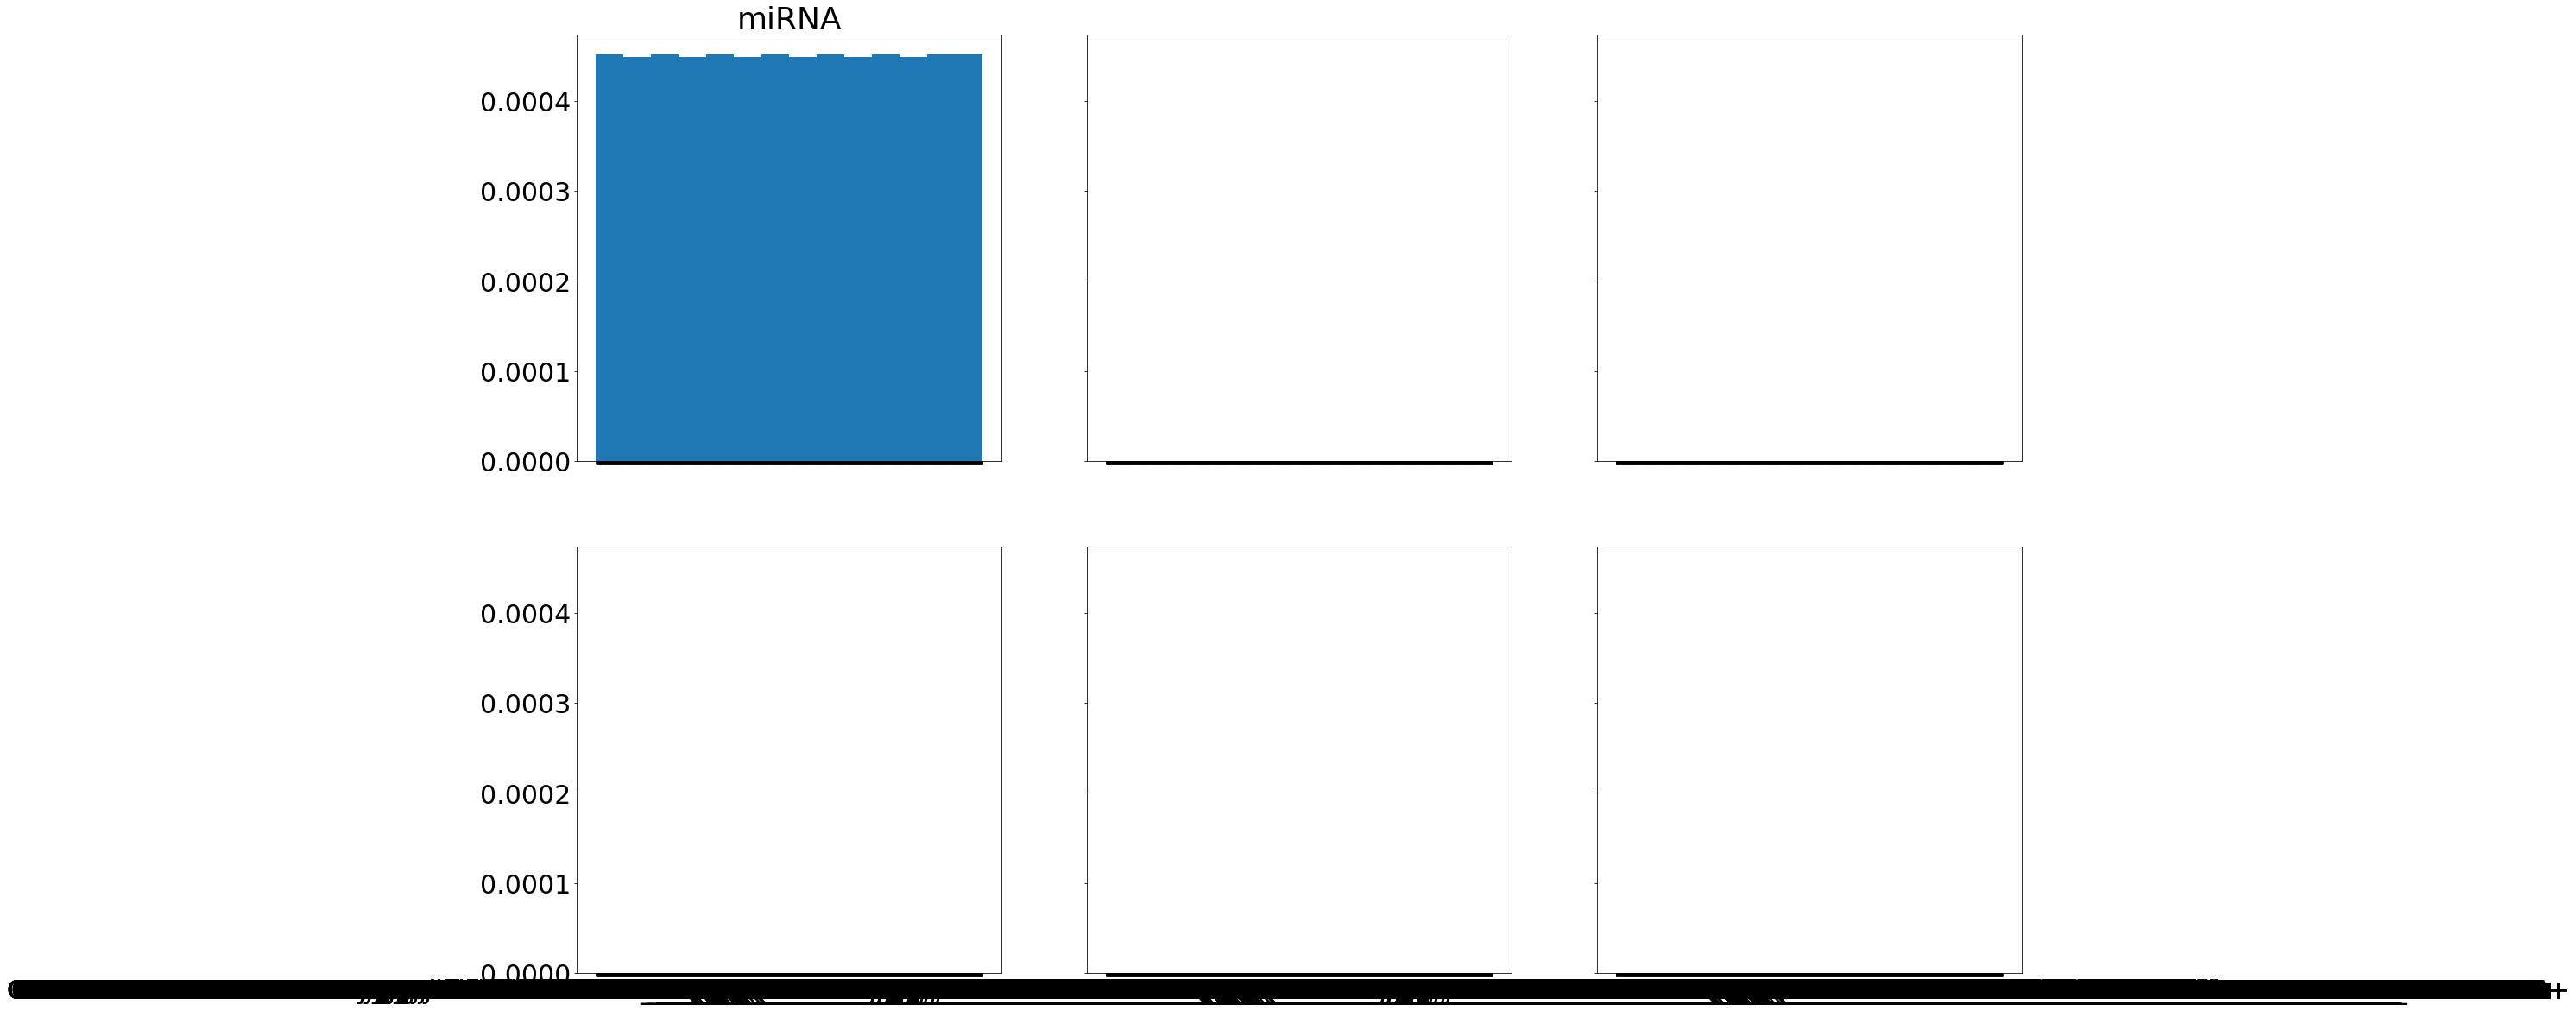

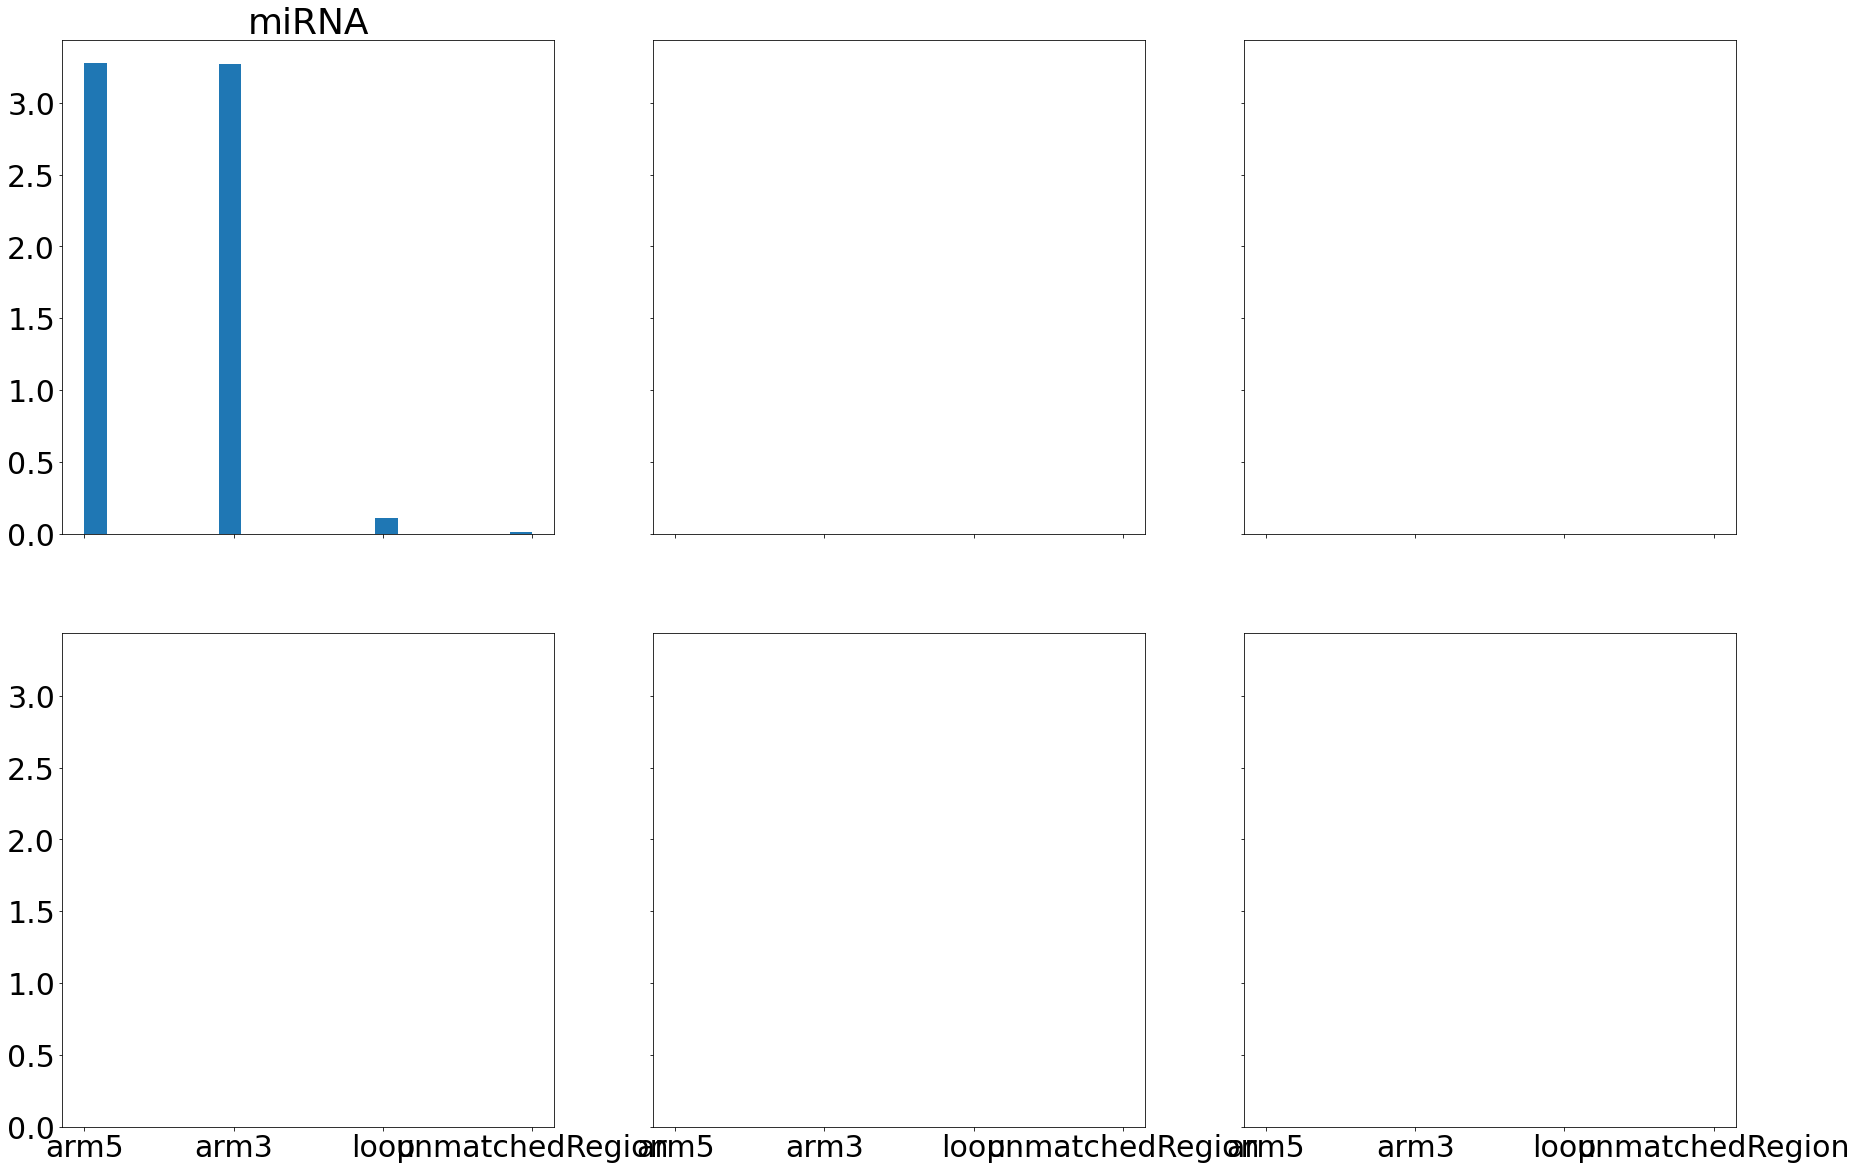

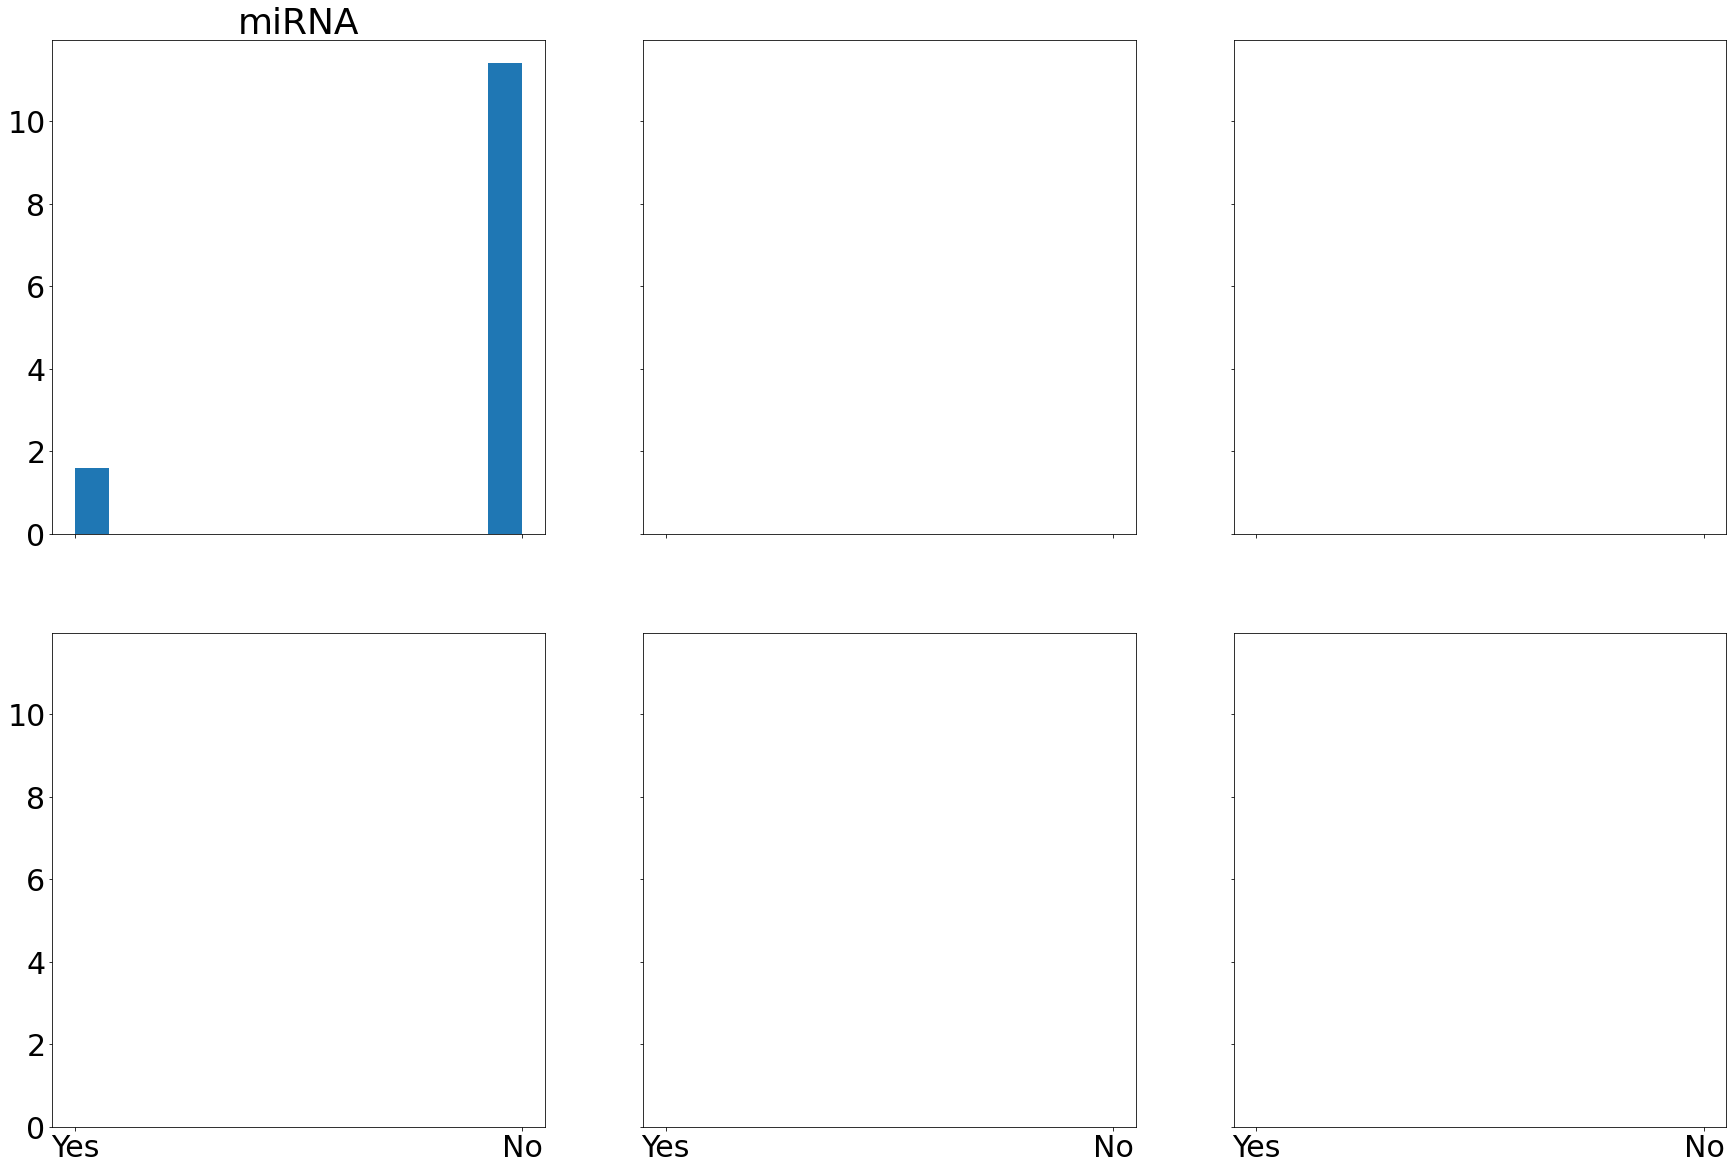

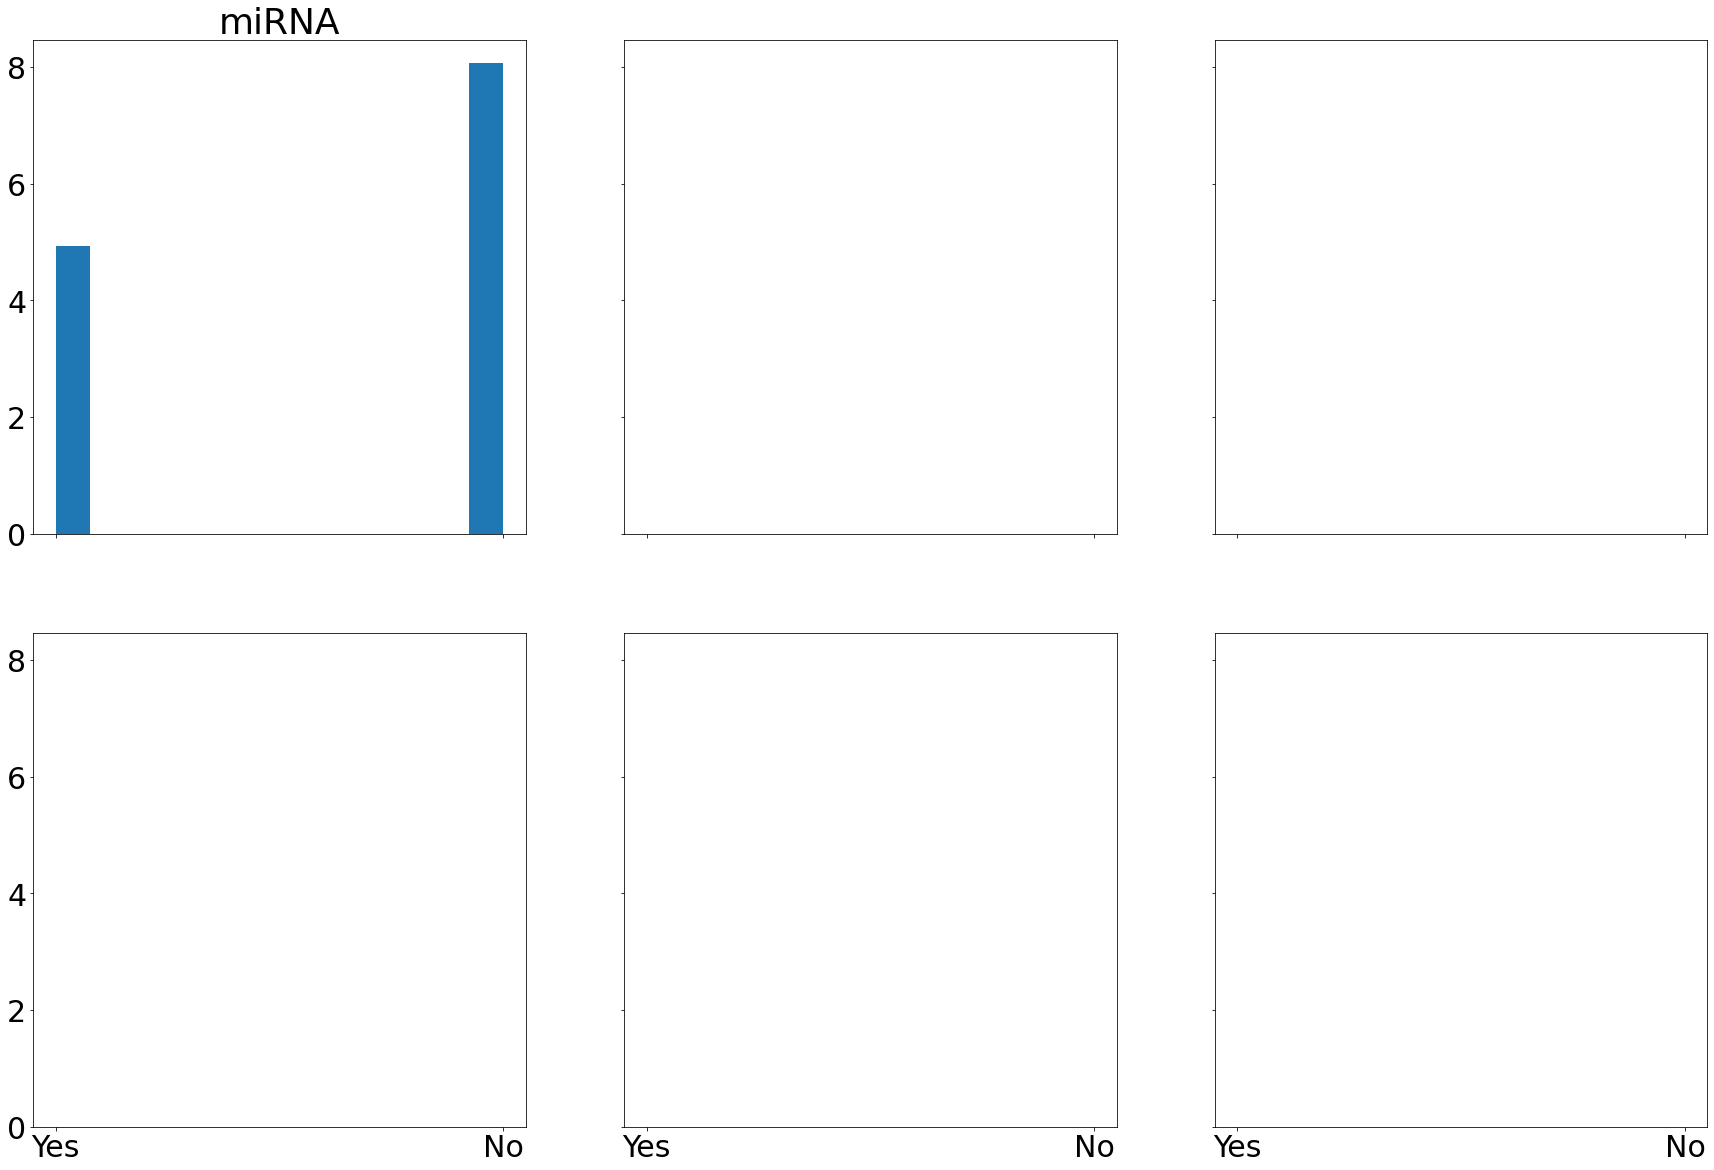

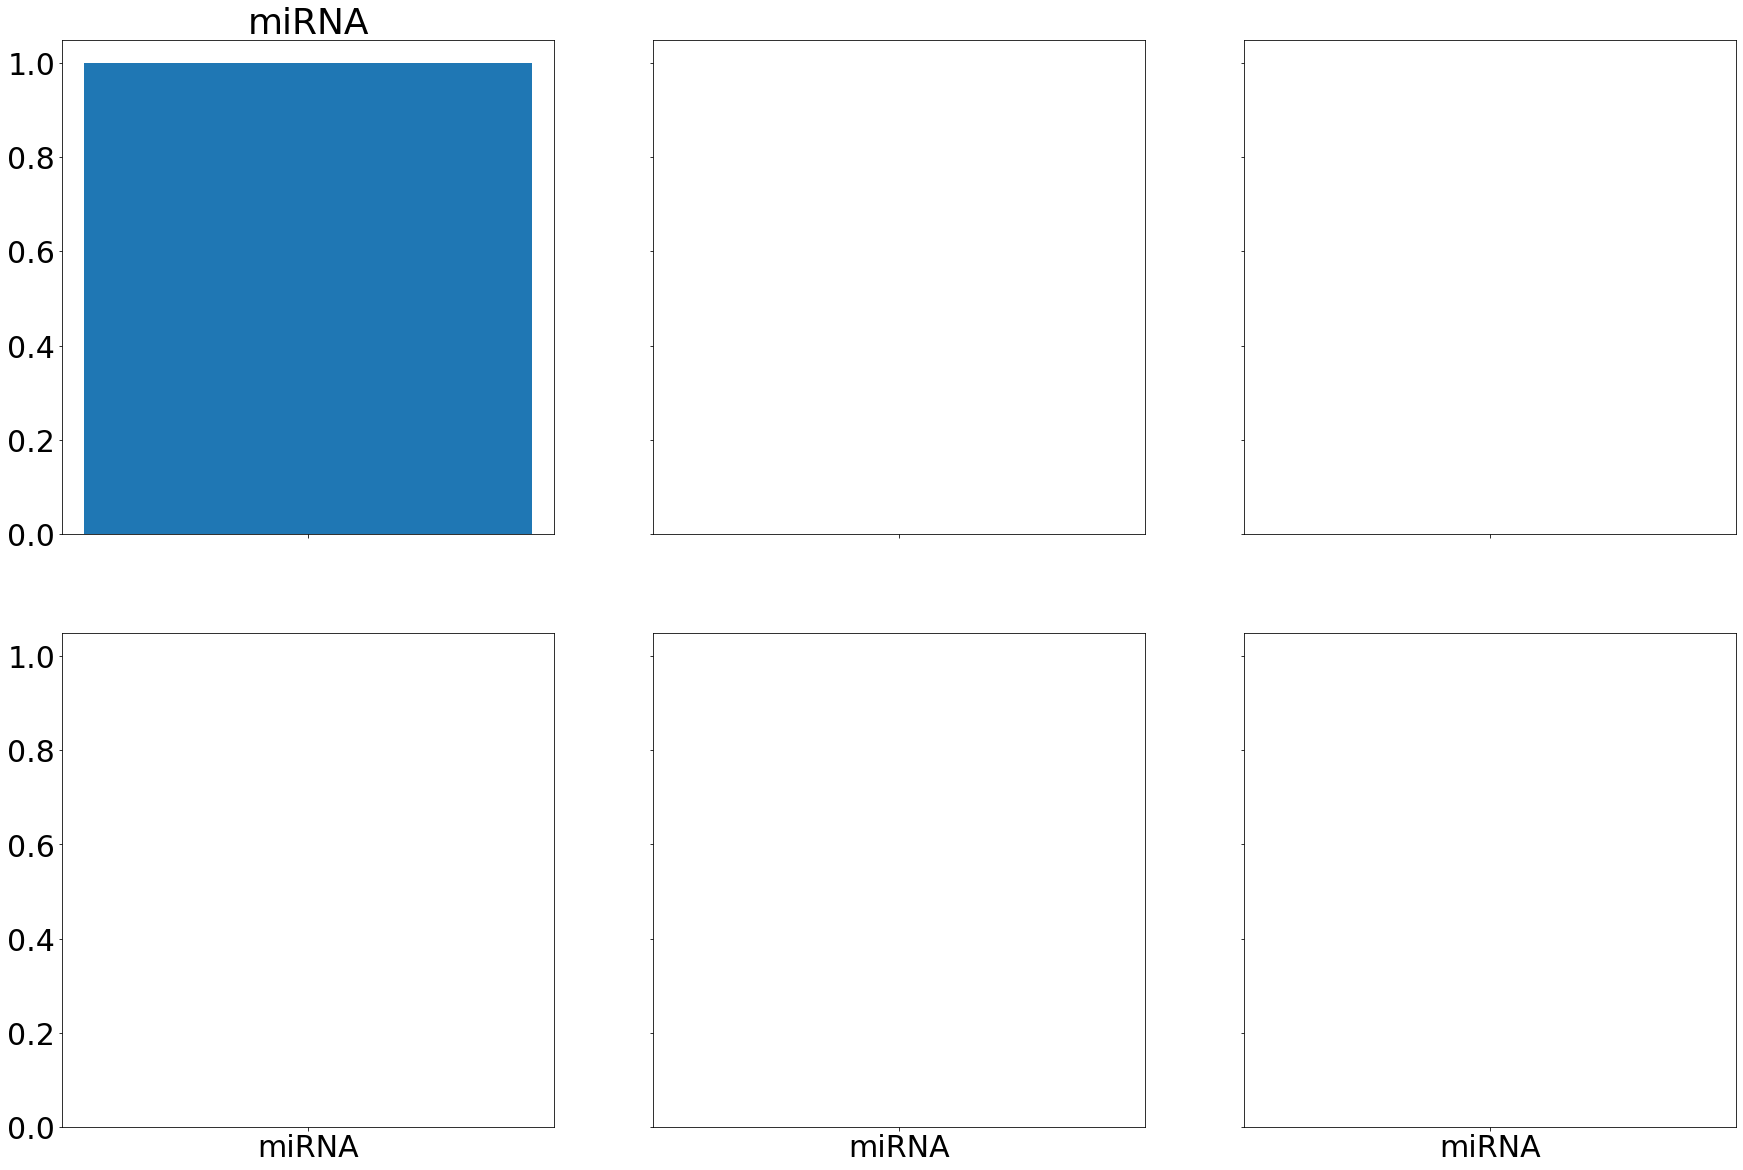

In [253]:
for column in cols_for_plotting:
    try:
        compare_features(df, column, rna_subtypes=subtypes)
    except:
        pass

In [252]:
compare_features(df, 'mFE', rna_subtypes=subtypes);

In [259]:
df[df['clusterName'].str.contains('GMJZF.lncRNA')]['clusterName'].values[15]

'GTEX-1117F-0005-SM-GMJZF.lncRNA:miRCluster_130_25:chr17:30117094_30117118+'

In [256]:
df.columns

Index(['realMicRNA', 'realMicRNAName', 'clusterName', 'seqCount',
       'readCountSum', 'exactMatchRatio', 'headUnstableLength',
       'tailUnstableLength', 'head_minus3_templateNucleotide',
       'head_minus3_TemplateNucleotide_percentage', 'head_minus3_A_percentage',
       'head_minus3_T_percentage', 'head_minus3_C_percentage',
       'head_minus3_G_percentage', 'head_minus2_templateNucleotide',
       'head_minus2_TemplateNucleotide_percentage', 'head_minus2_A_percentage',
       'head_minus2_T_percentage', 'head_minus2_C_percentage',
       'head_minus2_G_percentage', 'head_minus1_templateNucleotide',
       'head_minus1_TemplateNucleotide_percentage', 'head_minus1_A_percentage',
       'head_minus1_T_percentage', 'head_minus1_C_percentage',
       'head_minus1_G_percentage', 'tail_plus1_templateNucleotide',
       'tail_plus1_TemplateNucleotide_percentage', 'tail_plus1_A_percentage',
       'tail_plus1_T_percentage', 'tail_plus1_C_percentage',
       'tail_plus1_G_percentage',